# Etude des donnees du confinement


## lecture de fichier csv

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
mypath=os.getcwd()
print(mypath)

/home/jovyan/work/module2/exo4


C'est là qu'on est

In [2]:
os.listdir(mypath)

['exercice_python_en.org',
 'exercice_fr.ipynb',
 'exercice.ipynb',
 'exercice_fr.Rmd',
 'spokes_calc.ipynb',
 'exercice_python_fr.org',
 'exercice_R_en.org',
 'exercice_R_fr.org',
 'exercice_en.Rmd',
 'exercice_en.ipynb',
 '.ipynb_checkpoints',
 'donnees.csv',
 'Untitled.ipynb']

In [3]:
print(mypath + "/*.csv")

/home/jovyan/work/module2/exo4/*.csv


In [4]:
import glob
csvlist = [f for f in glob.glob("*.csv")]
print(csvlist)

['donnees.csv']


In [5]:
filename=csvlist[0]
print(filename)

donnees.csv


In [6]:
import pandas as pd
variable = pd.read_csv(r"/home/jovyan/work/module2/exo4/donnees.csv",sep=';')
variable.head()

Unnamed: 0        date     sport    durée   FCmoy    FCmax  \
0         NaN       -----     -----   ------  ------  -------   
1         NaN  18/03/2020      vélo  1:09:16     128      176   
2         NaN  19/03/2020      vélo  2:29:58     151      188   
3         NaN  20/03/2020      vélo  0:44:05     144      176   
4         NaN  25/03/2020  crossfit  0:51:25     128      182   

    intensitéressentie  Unnamed: 7  
0  -------------------         NaN  
1               facile         NaN  
2                 mod+         NaN  
3               facile         NaN  
4                 mod+         NaN

In [7]:
variable = pd.read_csv(r"/home/jovyan/work/module2/exo4/donnees.csv",sep=';',header=0,usecols=[1,2,3,4,5,6],skiprows=[1],skipinitialspace=1)
variable.head()

date     sport    durée  FCmoy  FCmax intensitéressentie
0  18/03/2020      vélo  1:09:16  128.0  176.0             facile
1  19/03/2020      vélo  2:29:58  151.0  188.0               mod+
2  20/03/2020      vélo  0:44:05  144.0  176.0             facile
3  25/03/2020  crossfit  0:51:25  128.0  182.0               mod+
4  26/03/2020      vélo  0:45:29  162.0  193.0              mod++

In [8]:
mat=variable.values
print(mat)

[['18/03/2020' 'vélo' '1:09:16' 128.0 176.0 'facile']
 ['19/03/2020' 'vélo' '2:29:58' 151.0 188.0 'mod+']
 ['20/03/2020' 'vélo' '0:44:05' 144.0 176.0 'facile']
 ['25/03/2020' 'crossfit' '0:51:25' 128.0 182.0 'mod+']
 ['26/03/2020' 'vélo' '0:45:29' 162.0 193.0 'mod++']
 ['30/03/2020' 'cap' '0:39:04' 158.0 189.0 'mod++']
 ['30/03/2020' 'crossfit' '0:29:14' 130.0 169.0 'mod+']
 ['31/03/2020' 'vélo' '0:41:52' 156.0 181.0 'mod+']
 ['01/04/2020' 'vélo' '0:39:06' 168.0 190.0 'mod++']
 ['04/04/2020' 'slack' '1:30:00' nan nan 'facile']
 ['05/04/2020' 'vélo' '1:03:41' 152.0 189.0 'mod++']
 ['05/04/2020' 'slack' '1:00:00' nan nan 'facile']]


In [9]:
[nrows,ncols]=mat.shape
print(nrows)

12


In [10]:
mat[:,0]

array(['18/03/2020', '19/03/2020', '20/03/2020', '25/03/2020',
       '26/03/2020', '30/03/2020', '30/03/2020', '31/03/2020',
       '01/04/2020', '04/04/2020', '05/04/2020', '05/04/2020'],
      dtype=object)

In [11]:
mat[0,0]

'18/03/2020'

In [12]:
from datetime import datetime, date, time, timezone
datetime.strptime(mat[0,0],"%d/%m/%Y")

datetime.datetime(2020, 3, 18, 0, 0)

In [13]:
time_str = '13:55:26'
time_object = datetime.strptime(time_str, '%H:%M:%S').time()
print(type(time_object))
print(time_object)

<class 'datetime.time'>
13:55:26


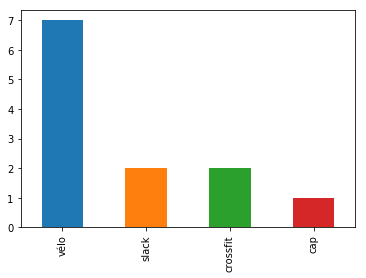

In [14]:
sport=mat[:,1]
pd.Series(sport).value_counts().plot('bar')
plt.show()

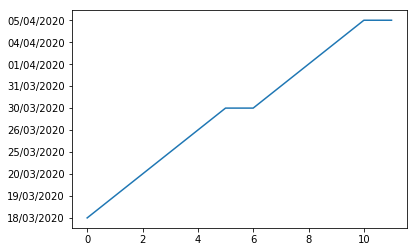

In [15]:
dates = mat[:,0]
dates_list = [datetime.strptime(date, '%d/%m/%Y').date() for date in dates]
plt.plot(dates)

In [16]:
mat[:,0]=dates_list

In [17]:
print(mat[:,0])

[datetime.date(2020, 3, 18) datetime.date(2020, 3, 19)
 datetime.date(2020, 3, 20) datetime.date(2020, 3, 25)
 datetime.date(2020, 3, 26) datetime.date(2020, 3, 30)
 datetime.date(2020, 3, 30) datetime.date(2020, 3, 31)
 datetime.date(2020, 4, 1) datetime.date(2020, 4, 4)
 datetime.date(2020, 4, 5) datetime.date(2020, 4, 5)]


In [18]:
durees=mat[:,2]
mat[:,2]=[datetime.strptime(time, '%H:%M:%S').time() for time in durees]

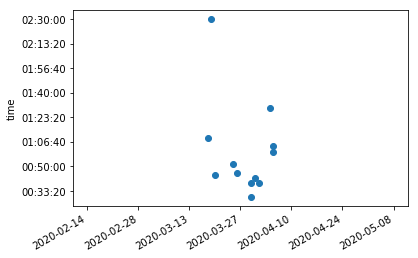

In [19]:
plt.scatter(dates,durees)
plt.gcf().autofmt_xdate()
plt.show()

In [20]:
mat

array([[datetime.date(2020, 3, 18), 'vélo', datetime.time(1, 9, 16),
        128.0, 176.0, 'facile'],
       [datetime.date(2020, 3, 19), 'vélo', datetime.time(2, 29, 58),
        151.0, 188.0, 'mod+'],
       [datetime.date(2020, 3, 20), 'vélo', datetime.time(0, 44, 5),
        144.0, 176.0, 'facile'],
       [datetime.date(2020, 3, 25), 'crossfit', datetime.time(0, 51, 25),
        128.0, 182.0, 'mod+'],
       [datetime.date(2020, 3, 26), 'vélo', datetime.time(0, 45, 29),
        162.0, 193.0, 'mod++'],
       [datetime.date(2020, 3, 30), 'cap', datetime.time(0, 39, 4),
        158.0, 189.0, 'mod++'],
       [datetime.date(2020, 3, 30), 'crossfit', datetime.time(0, 29, 14),
        130.0, 169.0, 'mod+'],
       [datetime.date(2020, 3, 31), 'vélo', datetime.time(0, 41, 52),
        156.0, 181.0, 'mod+'],
       [datetime.date(2020, 4, 1), 'vélo', datetime.time(0, 39, 6),
        168.0, 190.0, 'mod++'],
       [datetime.date(2020, 4, 4), 'slack', datetime.time(1, 30), nan,
        nan